In [6]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [7]:
# Load data into the dataframe.
montgomery_df = pd.read_csv(os.path.join('..', 'csv_data', 'house_info_school_assignments_dropna_transform.csv'))
montgomery_df

,price,dateSold,bathrooms,bedrooms,livingArea,homeType,lotAreaValue,zipcode,elem,middle,high,AgeYears
0,800000,Q3_2021,4.0,5.0,3650.0,SINGLE_FAMILY,222156.000000,20854,wayside elementary,herbert hoover middle,winston churchill high,42.0
1,800000,Q2_2021,1.0,2.0,1400.0,SINGLE_FAMILY,10890.000000,20814,kensington parkwood elementary,tilden middle,walter johnson high,106.0
2,800000,Q3_2020,3.0,4.0,1826.0,SINGLE_FAMILY,9148.000000,20817,bethesda elementary,tilden middle,walt whitman high,65.0
3,800000,Q2_2021,3.0,4.0,2810.0,SINGLE_FAMILY,9811.000000,20854,ritchie park elementary,cabin john middle,winston churchill high,56.0
4,800000,Q1_2021,2.0,5.0,2115.0,SINGLE_FAMILY,16521.999987,20815,bethesda elementary,thomas w. pyle middle,albert einstein high,153.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9667,358000,Q2_2021,4.0,3.0,1762.0,TOWNHOUSE,1800.000000,20882,woodfield elementary,hallie wells middle,clarksburg high,34.0
9668,358000,Q2_2021,3.0,3.0,1673.0,TOWNHOUSE,2001.000000,20879,strawberry knoll elementary,gaithersburg middle,gaithersburg high,42.0
9669,358500,Q1_2021,4.0,5.0,1386.0,TOWNHOUSE,1650.000000,20877,flower hill elementary,gaithersburg middle,gaithersburg high,37.0
9670,358888,Q2_2021,3.0,3.0,1420.0,TOWNHOUSE,2160.000000,20878,summit hall elementary,lakelands park middle,gaithersburg high,35.0


In [8]:
# Find column types.
montgomery_df.dtypes

price             int64
dateSold         object
bathrooms       float64
bedrooms        float64
livingArea      float64
homeType         object
lotAreaValue    float64
zipcode           int64
elem             object
middle           object
high             object
AgeYears        float64
dtype: object

In [9]:
# homeType and dateSold are categorical variable. Create dummy variables.
montgomery_df = pd.get_dummies(montgomery_df, columns=["homeType"])
montgomery_df = pd.get_dummies(montgomery_df, columns=["dateSold"])

In [10]:
montgomery_df

,price,bathrooms,bedrooms,livingArea,lotAreaValue,zipcode,elem,middle,high,AgeYears,homeType_CONDO,homeType_SINGLE_FAMILY,homeType_TOWNHOUSE,dateSold_Q1_2021,dateSold_Q2_2021,dateSold_Q3_2020,dateSold_Q3_2021
0,800000,4.0,5.0,3650.0,222156.000000,20854,wayside elementary,herbert hoover middle,winston churchill high,42.0,0,1,0,0,0,0,1
1,800000,1.0,2.0,1400.0,10890.000000,20814,kensington parkwood elementary,tilden middle,walter johnson high,106.0,0,1,0,0,1,0,0
2,800000,3.0,4.0,1826.0,9148.000000,20817,bethesda elementary,tilden middle,walt whitman high,65.0,0,1,0,0,0,1,0
3,800000,3.0,4.0,2810.0,9811.000000,20854,ritchie park elementary,cabin john middle,winston churchill high,56.0,0,1,0,0,1,0,0
4,800000,2.0,5.0,2115.0,16521.999987,20815,bethesda elementary,thomas w. pyle middle,albert einstein high,153.0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9667,358000,4.0,3.0,1762.0,1800.000000,20882,woodfield elementary,hallie wells middle,clarksburg high,34.0,0,0,1,0,1,0,0
9668,358000,3.0,3.0,1673.0,2001.000000,20879,strawberry knoll elementary,gaithersburg middle,gaithersburg high,42.0,0,0,1,0,1,0,0
9669,358500,4.0,5.0,1386.0,1650.000000,20877,flower hill elementary,gaithersburg middle,gaithersburg high,37.0,0,0,1,1,0,0,0
9670,358888,3.0,3.0,1420.0,2160.000000,20878,summit hall elementary,lakelands park middle,gaithersburg high,35.0,0,0,1,0,1,0,0


In [11]:
# Find column types.
montgomery_df.dtypes

price                       int64
bathrooms                 float64
bedrooms                  float64
livingArea                float64
lotAreaValue              float64
zipcode                     int64
elem                       object
middle                     object
high                       object
AgeYears                  float64
homeType_CONDO              uint8
homeType_SINGLE_FAMILY      uint8
homeType_TOWNHOUSE          uint8
dateSold_Q1_2021            uint8
dateSold_Q2_2021            uint8
dateSold_Q3_2020            uint8
dateSold_Q3_2021            uint8
dtype: object

In [12]:
# Separate features and target.
X = montgomery_df.drop(columns=['price', 'zipcode', 'elem', 'middle', 'high'])
Y = montgomery_df['price']
print (f'Separating features and target: {X.shape} | {Y.shape}')

Separating features and target: (9672, 12) | (9672,)


In [13]:
# Split data into training and testing sets. 80% data is used for training
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=100)
print(f'After splitting data: X train:{X_train.shape}, Y train: {Y_train.shape}, \
X test: {X_test.shape}, Y test: {Y_test.shape}')

After splitting data: X train:(7737, 12), Y train: (7737,), X test: (1935, 12), Y test: (1935,)


In [14]:
# Instantiate a linear regression model and fit on training dataset.
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [15]:
# Make predictions on testing data.
Y_pred = lin_model.predict(X_test)

In [16]:
# Print the model coefficients.
print (f'Model intercept: {lin_model.intercept_}, Model coefficients: {lin_model.coef_}')

Model intercept: -244498.89017866598, Model coefficients: [ 9.16037485e+04  2.70910222e+03  1.54660855e+02 -3.31467651e-03
  3.51890546e+03 -2.70637725e+04  5.55821873e+04 -2.85184148e+04
 -2.20141727e+04  3.31505505e+04 -4.16975966e+04  3.05612188e+04]


In [17]:
# Print RMSE and accuracy.

# The mean squared error
print (f'Mean squared error: {mean_squared_error(Y_test, Y_pred):.2f}')

# Model accuracy:
print (f'Training accuracy: {lin_model.score(X_train, Y_train):.2f}')
print (f'Testing accuracy: {lin_model.score(X_test, Y_test):.2f}')

Mean squared error: 55094406903.90
Training accuracy: 0.67
Testing accuracy: 0.66


In [18]:
# The sklearn linear model fit doesn't give p-value information. To get this info and display
# it in a table, we will use statsmodels instead. 
# Source: https://stackoverflow.com/questions/27928275/find-p-value-significance-in-scikit-learn-linearregression
import statsmodels.api as sm

X2_train = sm.add_constant(X_train)
lin_mod = sm.OLS(Y_train,X2_train)

fii = lin_mod.fit()
summary = fii.summary2()
print (summary)

                            Results: Ordinary least squares
Model:                     OLS                    Adj. R-squared:           0.671      
Dependent Variable:        price                  AIC:                      212752.2924
Date:                      2021-09-25 12:37       BIC:                      212828.7838
No. Observations:          7737                   Log-Likelihood:           -1.0637e+05
Df Model:                  10                     F-statistic:              1576.      
Df Residuals:              7726                   Prob (F-statistic):       0.00       
R-squared:                 0.671                  Scale:                    5.1186e+10 
---------------------------------------------------------------------------------------
                          Coef.       Std.Err.     t    P>|t|     [0.025       0.975]  
---------------------------------------------------------------------------------------
const                  -154420.3517  48429.6343 -3.1886 0.00

In [20]:
# Now, instantiate the Random Forrest model.

# Test out different random forrest models accuracy against different number of estimators.

x_val = []
y_val = []

for n in range(3, 31):
    rf_model = RandomForestRegressor(criterion='mae', n_estimators=n, random_state=50)
    rf_model = rf_model.fit(X_train, Y_train)
    Y_pred = rf_model.predict(X_test)
    
    x_val.append(n)
    y_val.append(rf_model.score(X_test, Y_test))

    # The mean squared error
    print (f'n {n} | MSE {mean_squared_error(Y_test, Y_pred):.2f} | \
    Training Accuracy {rf_model.score(X_train, Y_train):.2f} | Testing Accuracy {rf_model.score(X_test, Y_test):.2f}')


n 3 | MSE 61035796964.95 |     Training Accuracy 0.91 | Testing Accuracy 0.62
n 4 | MSE 58424281973.59 |     Training Accuracy 0.92 | Testing Accuracy 0.64
n 5 | MSE 54492756047.57 |     Training Accuracy 0.93 | Testing Accuracy 0.66
n 6 | MSE 53740425916.69 |     Training Accuracy 0.93 | Testing Accuracy 0.67
n 7 | MSE 50956191227.07 |     Training Accuracy 0.94 | Testing Accuracy 0.68
n 8 | MSE 49259408166.60 |     Training Accuracy 0.94 | Testing Accuracy 0.69
n 9 | MSE 48393321138.97 |     Training Accuracy 0.94 | Testing Accuracy 0.70
n 10 | MSE 47970629656.65 |     Training Accuracy 0.94 | Testing Accuracy 0.70
n 11 | MSE 47339014891.67 |     Training Accuracy 0.95 | Testing Accuracy 0.71
n 12 | MSE 47216148214.71 |     Training Accuracy 0.95 | Testing Accuracy 0.71
n 13 | MSE 46918948731.93 |     Training Accuracy 0.95 | Testing Accuracy 0.71
n 14 | MSE 46396701716.66 |     Training Accuracy 0.95 | Testing Accuracy 0.71
n 15 | MSE 46395206922.06 |     Training Accuracy 0.95 | Te

<AxesSubplot:xlabel='x'>

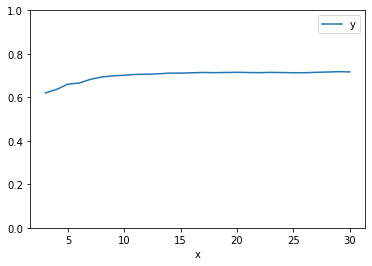

In [21]:
df = pd.DataFrame(list(zip(x_val, y_val)), columns =['x', 'y'])
df.plot.line(x='x', y='y', ylim=(0, 1.0))

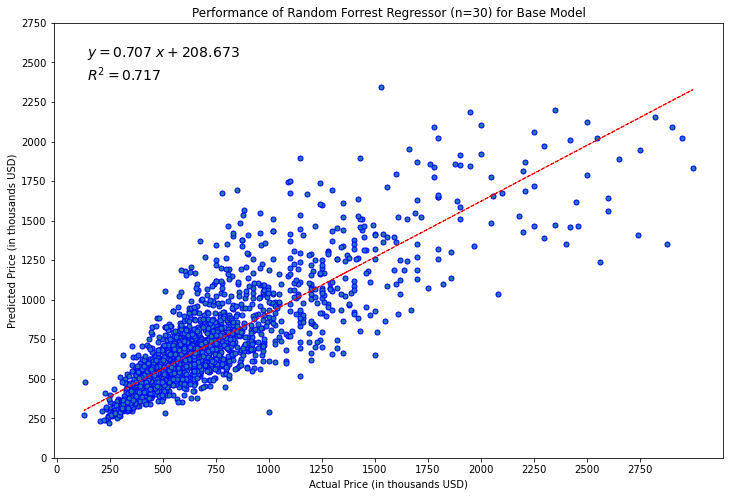

In [39]:
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy as np

x = Y_test/1000
y = Y_pred/1000

plt.figure(figsize=(12,8))

plt.plot(x,y,".", ms=10, mec="b")
z = np.polyfit(x, y, 1)
y_hat = np.poly1d(z)(x)

plt.plot(x, y_hat, "r--", lw=1)
text = f"$y={z[0]:0.3f}\;x{z[1]:+0.3f}$\n$R^2 = {r2_score(y,y_hat):0.3f}$"
plt.gca().text(0.05, 0.95, text,transform=plt.gca().transAxes, fontsize=14, verticalalignment='top')

plt.ylabel('Predicted Price (in thousands USD)')
plt.xlabel('Actual Price (in thousands USD)')
plt.title('Performance of Random Forrest Regressor (n=30) for Base Model')

plt.xticks(np.arange(0, 3000, step=250))
plt.yticks(np.arange(0, 3000, step=250))

plt.gcf().axes[0].xaxis.get_major_formatter().set_scientific(False)
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)